# Monte Carlo Estimation: Computing Estimation Error

We use the Central Limit Theorem (CLT) to compute how accurate our Monte Carlo estimates are.

In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

## Example 1

We seek the expected value of $\theta$, or the mean of the Gamma distribution defined below.

In [2]:
m = 10000
a, b = 2, 1/3
theta = stats.gamma.rvs(a, scale=(1/b), size=m)

We seek the sample mean of theta, which approximately follows a Normal distribution, where the mean of this Normal distribution is the true expected value of $\theta$, and the variance of the Normal distribution is the true variance of $\theta$ divided by m. Thus as we increase m, variance gets smaller.


### 90% confidence interval for $\theta$

Formula for standard error is the standard deviation of the Normal distribution divided by square root of m.

The 90% confidence interval for a normal distribution is $\mu$ $\pm$ 2\*standard_error. This is the interval where we are 90% confident that values from the distribution will occur.

In [3]:
mean = np.mean(theta)
se = np.std(theta) / np.sqrt(m)
print("                   mean: {:.5f}".format(mean))
print("         standard error: {:.5f}".format(se))
ci_90_lb, ci_90_ub = mean - (2 * se), mean + (2 * se)
print("90% confidence interval: ({:.5f}, {:.5f})".format(ci_90_lb, ci_90_ub))

                   mean: 5.97243
         standard error: 0.04309
90% confidence interval: (5.88626, 6.05860)


### 90% confidence interval for Pr($\theta$ < 5)

In [4]:
theta_ind = theta < 5
mean = np.mean(theta_ind)
se = np.std(theta_ind) / np.sqrt(m)
print("                   mean: {:.5f}".format(mean))
print("         standard error: {:.5f}".format(se))
ci_90_lb, ci_90_ub = mean - (2 * se), mean + (2 * se)
print("90% confidence interval: ({:.5f}, {:.5f})".format(ci_90_lb, ci_90_ub))

                   mean: 0.50480
         standard error: 0.00500
90% confidence interval: (0.49480, 0.51480)


### Error Estimate for Hierarchical Model

We define our hierarchical model as follow:

$$y_i \sim Binomial(10, \phi_i)$$
$$\phi_i \sim Beta(2, 2)$$

The resulting sample of y can be treated as the marginal distribution. 

The distribution for (y|$\phi$) is a binomial distribution, but marginal distribution for y is __not binomial__, it is beta-binomial.

In [5]:
m = int(1e5)
phi = stats.beta.rvs(2, 2, size=m)
y = stats.binom.rvs(10, phi, size=m)

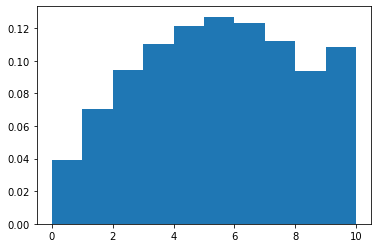

In [6]:
plt.hist(y, density=True)
plt.show()

### Probability of 3 successes, Pr(y=3)

In [7]:
ind_y = (y == 3)
np.mean(ind_y)

0.11032

### Marginal Expected Value of y

In [8]:
np.mean(y)

4.99803